In [46]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString, MultiLineString

In [56]:

class GoalPolygon:
    def __init__(self, name):
        self.name = name
        self.frame = ox.geocode_to_gdf(name)
        self.frameproj = ox.project_gdf(ox.geocode_to_gdf(name))
        self.polygon = self.coordinates_poly()
        self.network = self.network_clean()

    def coordinates_poly(self):
        coordinates = []
        polygon = self.frameproj.boundary[0]
        # coordinates = list(polygon.coords)
        for i in polygon.coords:
            coordinates.append(list(i))
        return Polygon(coordinates)

    def network_clean(self):
        network = ox.graph_from_place(self.name, network_type="all", buffer_dist=50)
        network = ox.project_graph(network)
        gdf_nodes, gdf_edges = ox.graph_to_gdfs(network)

        for i in gdf_edges.geometry.keys():
            if gdf_edges.geometry[i].crosses(self.polygon) or self.polygon.covers(gdf_edges.geometry[i]):
                network.remove_edge(*i)
            else:
                pass
        network = ox.utils_graph.remove_isolated_nodes(network)
        #ox.plot_graph(network)
        return network



In [ ]:
#for plot

netw_all

/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


<AxesSubplot:>

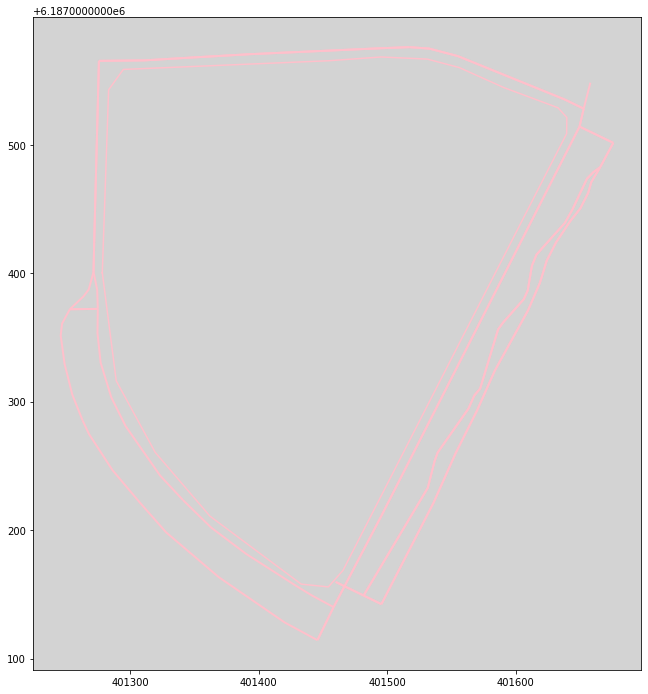

In [70]:
place = GoalPolygon(['Бизнес-парк "Ростех-Сити"'])
nodes, edges = ox.graph_to_gdfs(place.network)
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('lightgrey')
x,y = place.polygon.exterior.xy
plt.plot(x,y,color='pink')
edges.plot(ax=ax, linewidth=2, edgecolor='pink')